In [25]:
from Color_functions import *
from skimage import io
from skimage.color import rgb2lab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.gray()

<Figure size 640x480 with 0 Axes>

In [22]:
buckets = 24
la = np.zeros((buckets,buckets))
lb = np.zeros((buckets,buckets))
ab = np.zeros((buckets,buckets))

In [4]:
def indexL(l):
    return int(min(np.floor((l/100) * buckets), buckets-1))
def indexab(x):
    return int(min(np.floor(buckets*(x+128)/(127+128)), buckets-1))

In [5]:
def load_image(i):
    img_rgb = io.imread("imagenes/images_prepped_train/img("+str(i)+").jpg").astype("float32") / 255
    img_lab = rgb2lab(img_rgb)
    
    img_mask = io.imread("imagenes/annotations_prepped_train/img("+str(i)+").png").astype("float32") / 255
    pixeles_fuego = img_lab[img_mask == 1.0]

    L = pixeles_fuego[:,0]
    a = pixeles_fuego[:,1]
    b = pixeles_fuego[:,2]

    for i in range(pixeles_fuego.shape[0]):
        il = indexL(L[i])
        ia = indexab(a[i])
        ib = indexab(b[i])

        la[il][ia] += 1
        lb[il][ib] += 1
        ab[ia][ib] += 1

    return pixeles_fuego.shape[0]

In [23]:
pixeles_totales = 0
for i in range(1,301):
    pixeles_totales += load_image(i)
la /= pixeles_totales
lb /= pixeles_totales
ab /= pixeles_totales

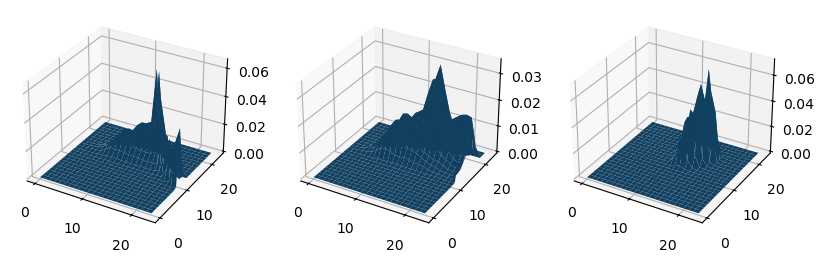

In [24]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

x = np.outer(np.arange(buckets), np.ones(buckets))
y = x.copy().T

ax1.plot_surface(x, y, la)
ax2.plot_surface(x, y, lb)
ax3.plot_surface(x, y, ab)

plt.show()

In [30]:
pd.DataFrame(la).to_csv('la.csv')
pd.DataFrame(lb).to_csv('lb.csv')
pd.DataFrame(ab).to_csv('ab.csv')